## Import statements, install tensorflow if haven't yet

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import nltk 
import string
import re

## Load the dataset
### Currently: dataset is tweetData.csv with 8 parameters and 1 label column, labels are 0 1 and 2 (not depressed, possibly depressed and depressed)

In [2]:
# load csv, create labels and features
tweets = pd.read_csv("tweetData.csv")
tweets_features = tweets.copy()
tweets_labels = tweets_features.pop('label')
tweets.head()

,label,polar,subjective,year,month,day,in_between,keyword_score,1stperson_score
0,0.0,0.800000,0.750000,2021.0,4.0,21.0,0.0,0.0,0.0
1,0.0,-0.750000,1.000000,2021.0,4.0,17.0,4.0,0.0,1.0
2,0.0,0.045455,0.151515,2021.0,4.0,14.0,3.0,0.0,1.0
3,0.0,-0.200000,0.300000,2021.0,4.0,14.0,0.0,0.0,3.0
4,0.0,0.000000,0.000000,2021.0,4.0,12.0,2.0,0.0,2.0


## Preprocess our data
### Create train and test datasets and randomize them. Here we also convert our labels into one-hot encoded vectors for multi class categorization

In [3]:
x = tweets_features.dropna()
y = tweets_labels.dropna()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in tweets_labels.
y = label_encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Create the network
### Currently: Sequential model with 4 hidden layers, the first one is 2 layers, our input layer taking in 8 parameters (all the number data) and the first hidden layer with 16 neurons. Then it has 2 more hidden layers with 32 neurons, a final hidden layer with 16, and an output layer with 3 neurons (its guessing 0 1 or 2)

In [4]:
model = keras.Sequential([
    Dense(units=16, input_dim=8, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dropout(0.5),
    Dense(units=3, activation='softmax')
])

## Compile the model
### Currently: Categorical cross entropy as loss function, Adam optimizer

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

## Print a summary of the model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,843
Trainable params: 1,843
Non-trainable params: 0
_________________________________________________________________


## Print model layout

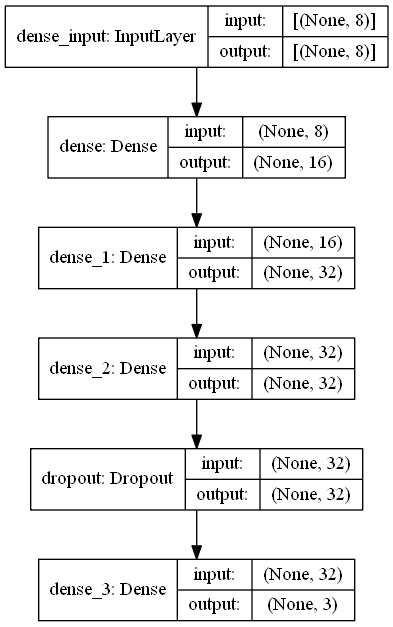

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

## Train the model with the training data

In [8]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
191/191 [==============================] - 4s 15ms/step - loss: 95.5888 - acc: 0.5359 - val_loss: 1.2698 - val_acc: 0.6805
Epoch 2/20
191/191 [==============================] - 1s 3ms/step - loss: 1.1446 - acc: 0.6934 - val_loss: 0.6777 - val_acc: 0.6805
Epoch 3/20
191/191 [==============================] - 1s 4ms/step - loss: 0.7387 - acc: 0.6928 - val_loss: 0.6698 - val_acc: 0.6805
Epoch 4/20
191/191 [==============================] - 1s 4ms/step - loss: 0.7520 - acc: 0.6886 - val_loss: 0.6716 - val_acc: 0.6805
Epoch 5/20
191/191 [==============================] - 1s 4ms/step - loss: 0.7469 - acc: 0.6812 - val_loss: 0.7022 - val_acc: 0.6805
Epoch 6/20
191/191 [==============================] - 1s 4ms/step - loss: 0.7580 - acc: 0.6762 - val_loss: 0.6912 - val_acc: 0.6805
Epoch 7/20
191/191 [==============================] - 1s 4ms/step - loss: 0.7204 - acc: 0.6888 - val_loss: 0.6946 - val_acc: 0.6805
Epoch 8/20
191/191 [==============================] - 1s 3ms/step - loss: 

## Evaluate the model using the testing data

In [9]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

60/60 [==============================] - 0s 1ms/step - loss: 0.6881 - acc: 0.6882
Test Score: 0.6880855560302734
Test Accuracy: 0.6882229447364807


## Graph the accuracy and loss against validation accuracy and loss 

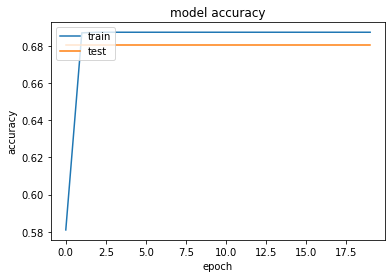

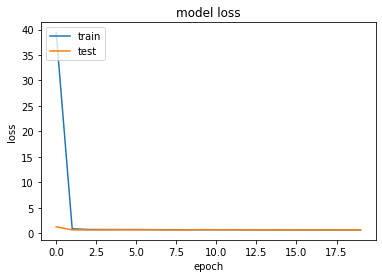

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Create predictions
### For now we are using testData.csv, a csv file of a twitter account converted using the scraper bot

In [11]:
pred_data = pd.read_csv("testData.csv")
valid = pred_data.pop("label")
pred_data.head()

,polarity,subjectivivity,year,month,day,in_between,keyword_score,1stperson_score
0,0.000000,0.000000,2021,4,29,0,0,1
1,0.800000,0.750000,2021,4,21,8,0,0
2,-0.750000,1.000000,2021,4,17,4,0,1
3,0.045455,0.151515,2021,4,14,3,0,1
4,-0.200000,0.300000,2021,4,14,0,0,3


In [12]:
prediction = np.argmax(model.predict(pred_data) > 0.5).astype("int32")
actual = valid.iloc[0]

if prediction == 0:
    prediction = str(prediction) + " (not depressed)"
elif prediction == 1:
    prediction = str(prediction) + " (possibly depressed)"
elif actual == 2:
    prediction = str(prediction) + " (depressed)"

if actual == 0:
    actual = str(actual) + " (not depressed)"
elif actual == 1:
    actual = str(actual) + " (possibly depressed)"
elif actual == 2:
    actual = str(actual) + " (depressed)"
    

print("Prediction:", prediction ,"Actual:",actual)

Prediction: 0 (not depressed) Actual: 0 (not depressed)
